 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Node-information" data-toc-modified-id="Node-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Node information</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#String-processing" data-toc-modified-id="String-processing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>String processing</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Neighbors" data-toc-modified-id="Neighbors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Neighbors</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Bag-of-Words-Abstract" data-toc-modified-id="Bag-of-Words-Abstract-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bag of Words Abstract</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Node2vec-embeddings" data-toc-modified-id="Node2vec-embeddings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Node2vec embeddings</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Feature-engineering" data-toc-modified-id="Feature-engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Feature-Selection" data-toc-modified-id="Feature-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#node2vec" data-toc-modified-id="node2vec-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>node2vec</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Set-of-features-$F$" data-toc-modified-id="Set-of-features-$F$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Set of features $F$</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Combination-of-node2vec-and-features-$F$" data-toc-modified-id="Combination-of-node2vec-and-features-$F$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Combination of node2vec and features $F$</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Fine-tuning-the-set-$F$" data-toc-modified-id="Fine-tuning-the-set-$F$-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fine-tuning the set $F$</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Comparison-of-classifiers" data-toc-modified-id="Comparison-of-classifiers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of classifiers</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Gradient-boosting" data-toc-modified-id="Gradient-boosting-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gradient boosting</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Gradient-Boosting-hyperparameter-optimization" data-toc-modified-id="Gradient-Boosting-hyperparameter-optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gradient Boosting hyperparameter optimization</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-predict-missing-links/predict_missing_links.ipynb#Predictions" data-toc-modified-id="Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictions</a></span></li></ul></div>

In [115]:
import pandas as pd
import numpy as np
import random
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.utils import shuffle

In [38]:
plt.style.use("ggplot")

In [39]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [40]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# Display all the columns when showing DataFrames
pd.set_option("display.max_columns", None)

The goal of this assignment is to identify missing citations in a citation network of research articles. A citation network is represented as a graph G=(V, E), where the nodes correspond to scientific articles and the existence of a directed edge between nodes u and v, indicates that paper u cites paper v.

Each node (i.e., article) is also associated with information such as the title of the paper, publication year, author names and a short abstract. A number of edges have been randomly removed from the original citation network.

Your goal is to accurately reconstruct the initial network using graph-theoretical and textual features, and possibly other information. Your solution can be based on supervised or unsupervised techniques for link prediction or on a combination of both. You should aim for the maximum F1 score.

# Node information

Please don't go over this section if the file `data/node_information_completed.csv` has already been created.

In [42]:
from utils import process_text, format_author_names

In [43]:
# Info for each node
with open("data/node_information.csv", "r") as f:
    reader = csv.reader(f)
    node_info  = list(reader)

IDs = [element[0] for element in node_info]
df_node_info = pd.DataFrame(node_info, columns=["paper_id", "year", "title", 
                                                "authors", "journal_name", "abstract"])
df_node_info.index = df_node_info.paper_id
df_node_info.drop("paper_id", axis=1, inplace=True)

## String processing 

In [44]:
# Put the year column to numeric setting
df_node_info["year"] = df_node_info.year.map(pd.to_numeric)

In [45]:
df_node_info["title_processed"] = df_node_info["title"].map(lambda t: process_text(t))

df_node_info["authors_processed"] = df_node_info["authors"].map(
                                    lambda l: [author for author in l.split(",") 
                                               if author not in (" ", "")])

df_node_info["abstract_processed"] = df_node_info["abstract"].map(lambda t: process_text(t))

Let's process the author names to be consistent:

In [46]:
# Clean the author names
df_node_info["authors_processed"] = df_node_info["authors_processed"]\
                                  .apply(lambda x: format_author_names(x))

In [47]:
df_node_info.head()

,year,title,authors,journal_name,abstract,title_processed,authors_processed,abstract_processed
paper_id,,,,,,,,
1001,2000,compactification geometry and duality,Paul S. Aspinwall,,these are notes based on lectures given at tas...,"[compactification, geometry, duality]",[P S Aspinwall],"[notes, based, lectures, given, tasi99, review..."
1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,"[domain, walls, massive, gauged, supergravity,...","[M Cvetic, H Lu, C N Pope]","[point, massive, gauged, supergravity, potenti..."
1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",,recently ivanov and volovich hep-th 9912242 cl...,"[comment, metric, fluctuations, brane, worlds]","[Y S Myung, G Kang]","[recently, ivanov, volovich, hep-th, 9912242, ..."
1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,"[moving, mirrors, thermodynamic, paradoxes]",[A D Helfer],"[quantum, fields, responding, moving, mirrors,..."
1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",,proceedings of lie iii clausthal july 1999 var...,"[bundles, chiral, blocks, boundary, conditions...","[J Fuchs, C Schweigert]","[proceedings, lie, iii, clausthal, july, 1999,..."


## Neighbors

In this section we get the direct neighbors for each node.

In [48]:
# Train set
with open("data/training_set.txt", "r") as f:
    reader = csv.reader(f)
    training_set  = list(reader)

training_set = [element[0].split(" ") for element in training_set]
df_train = pd.DataFrame(training_set, columns=["source", "target", "label"])

In [49]:
# Direct neighbors for each source node
df_neighbors = df_train.groupby("source")["target"].apply(lambda x: " ".join(x))

In [50]:
df_node_info = df_node_info.join(df_neighbors)
df_node_info.rename(columns={"target": "neighbors"}, inplace=True)

In [51]:
# List of neighbors 
df_node_info["neighbors"] = df_node_info["neighbors"].apply(lambda x: x.split())

In [52]:
df_node_info.head()

,year,title,authors,journal_name,abstract,title_processed,authors_processed,abstract_processed,neighbors
paper_id,,,,,,,,,
1001,2000,compactification geometry and duality,Paul S. Aspinwall,,these are notes based on lectures given at tas...,"[compactification, geometry, duality]",[P S Aspinwall],"[notes, based, lectures, given, tasi99, review...","[9603161, 9702094, 9703082, 9507158, 9404151, ..."
1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,"[domain, walls, massive, gauged, supergravity,...","[M Cvetic, H Lu, C N Pope]","[point, massive, gauged, supergravity, potenti...","[9912012, 9812035, 9902155, 9606076, 9809015, ..."
1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",,recently ivanov and volovich hep-th 9912242 cl...,"[comment, metric, fluctuations, brane, worlds]","[Y S Myung, G Kang]","[recently, ivanov, volovich, hep-th, 9912242, ...","[205120, 9409090, 211182, 9912242, 208125, 970..."
1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,"[moving, mirrors, thermodynamic, paradoxes]",[A D Helfer],"[quantum, fields, responding, moving, mirrors,...","[7129, 9305170, 9608190, 209232, 9910133, 1041..."
1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",,proceedings of lie iii clausthal july 1999 var...,"[bundles, chiral, blocks, boundary, conditions...","[J Fuchs, C Schweigert]","[proceedings, lie, iii, clausthal, july, 1999,...","[9908025, 9909114, 4153, 9805026, 9307074, 960..."


## Bag of Words Abstract

In [53]:
from utils import Word2vec, BoV

In [54]:
path_embeddings = r"C:\Users\Nasser Benab\Documents\school\m.v.a\deep_learning\mini_projects\mp2\data"

In this section, we encode the abstract using BoV embedding.

In [55]:
w2v = Word2vec(os.path.join(path_embeddings, "crawl-300d-200k.vec"), 
               nmax=200000)
s2v = BoV(w2v)

Loaded 200000 pretrained word vectors


In [56]:
df_node_info["abstract_embedding"] = [embd for embd 
                                      in s2v.encode(df_node_info.abstract_processed)]

In [57]:
df_node_info.head()

,year,title,authors,journal_name,abstract,title_processed,authors_processed,abstract_processed,neighbors,abstract_embedding
paper_id,,,,,,,,,,
1001,2000,compactification geometry and duality,Paul S. Aspinwall,,these are notes based on lectures given at tas...,"[compactification, geometry, duality]",[P S Aspinwall],"[notes, based, lectures, given, tasi99, review...","[9603161, 9702094, 9703082, 9507158, 9404151, ...","[0.016762745098039215, 0.15632156862745095, -0..."
1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,"[domain, walls, massive, gauged, supergravity,...","[M Cvetic, H Lu, C N Pope]","[point, massive, gauged, supergravity, potenti...","[9912012, 9812035, 9902155, 9606076, 9809015, ...","[0.04356931818181819, 0.1502068181818182, -0.0..."
1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",,recently ivanov and volovich hep-th 9912242 cl...,"[comment, metric, fluctuations, brane, worlds]","[Y S Myung, G Kang]","[recently, ivanov, volovich, hep-th, 9912242, ...","[205120, 9409090, 211182, 9912242, 208125, 970...","[-0.012898113207547173, 0.23114905660377363, -..."
1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,"[moving, mirrors, thermodynamic, paradoxes]",[A D Helfer],"[quantum, fields, responding, moving, mirrors,...","[7129, 9305170, 9608190, 209232, 9910133, 1041...","[0.005588000000000004, 0.15716799999999997, 0...."
1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",,proceedings of lie iii clausthal july 1999 var...,"[bundles, chiral, blocks, boundary, conditions...","[J Fuchs, C Schweigert]","[proceedings, lie, iii, clausthal, july, 1999,...","[9908025, 9909114, 4153, 9805026, 9307074, 960...","[0.08252173913043478, 0.15854347826086954, -0...."


In [58]:
# Save the new data for the node information
# df_node_info.to_csv("data/node_information_completed.csv")

Be careful, the embeddings are stored in arrays, but when saving they are turned to strings !

## Node2vec embeddings

The node2vec embeddings have been created using this [implementation](https://github.com/snap-stanford/snap/tree/master/examples/node2vec) on our directed graph. When computing the embeddings for the edges, we have used the Hadamard product of the source and target 128-dimensional embeddings. If a node is isolated, we use a null vector as its embedding (cf `utils.nodes_to_edge_embedding`).

In [23]:
node_embeddings = {}
with open("data/nodes.emb", "r") as f:
    next(f)
    for i, line in enumerate(f):
        node_id, vec = line.split(" ", 1)
        node_embeddings[node_id] = np.fromstring(vec, sep=" ")
    print("Loaded {} node embeddings".format(len(node_embeddings)))
    

Loaded 27684 node embeddings


> There are 27770 nodes in total in the network, 86 nodes are isolated

# Feature engineering

In order to be able to create a new feature, simply add a method to `FeatureEngineering` (e.g. `jaccard_coefficient`).

In [33]:
from feature_engineering import FeatureEngineering

In [25]:
# df_node_info = pd.read_csv("data/node_information_completed.csv", index_col=0)
# # The nodes are represented as strings as in the network data
df_node_info.index = df_node_info.index.astype("str")

In [180]:
feature_engineer = FeatureEngineering(df_node_info, node_embeddings,
                                      path_embeddings=path_embeddings,
                                      data="train")

--> Opening the source-node data
--> Computing and adding the edge embeddings
--> Merging the source-node data with the node information
--> Creating an undirected graph from the training data
--> Creating a directed graph from the training data


In [32]:
# Features to create 
features_to_create = ["in_degree_source", "in_degree_target", "out_degree_source", "out_degree_target", 
            "title_overlap", "temp_diff", "abstract_overlap", 
            "is_same_journal", "jaccard_coefficient", "adamic_adar", "pref_attachment", 
            "common_neighbors", "abstract_cosine_similarity"]
embedding_columns = ["emb{}".format(i+1) for i in range(128)]

features_columns = features_to_create + embedding_columns
features_label_columns = features_columns + ["label"]

In [183]:
%time feature_engineer.create_features(features=features_to_create)

--> Creating the feature 'in_degree_source' ...
it took 0min 31s
--> Creating the feature 'in_degree_target' ...
it took 0min 23s
--> Creating the feature 'out_degree_source' ...
it took 0min 21s
--> Creating the feature 'out_degree_target' ...
it took 0min 21s
--> Creating the feature 'title_overlap' ...
it took 0min 31s
--> Creating the feature 'temp_diff' ...
it took 0min 27s
--> Creating the feature 'abstract_overlap' ...
it took 1min 19s
--> Creating the feature 'is_same_journal' ...
it took 0min 0s
--> Creating the feature 'jaccard_coefficient' ...
it took 0min 35s
--> Creating the feature 'adamic_adar' ...
it took 2min 22s
--> Creating the feature 'pref_attachment' ...
it took 0min 52s
--> Creating the feature 'common_neighbors' ...
it took 0min 34s
--> Creating the feature 'abstract_cosine_similarity' ...
Loaded 200000 pretrained word vectors
it took 1min 43s
Wall time: 9min 57s


In [202]:
# Save the created features 
feature_engineer.df[features_label_columns].to_csv("data/data_features.csv")

# Feature Selection 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from utils import random_forest_features_importances

In this section, we study the impact of the different features on the `f1-score`, using a Random Forest classifier with 10 trees.
The importance of each feature corresponds to the "gini importance" or "mean decrease impurity" and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble.

Let's denote by $F$ the set of **13 features**: `in_degree_source`, `in_degree_target`, `out_degree_source`, `out_degree_target`, `title_overlap`, `temp_diff`, `abstract_overlap`, `is_same_journal`, `jaccard_coefficient`, `adamic_adar`, `pref_attachment`, `common_neighbors`, `abstract_cosine_similarity`.

We will compare the performance of the Random Forest on the *node2vec* 128 embeddings, the set $F$, and the two combined. This is done using a 5-fold cross-validation on the training set.

In [6]:
df = pd.read_csv("data/data_features.csv", index_col=0)

In [7]:
df.head()

,in_degree_source,in_degree_target,out_degree_source,out_degree_target,title_overlap,temp_diff,abstract_overlap,is_same_journal,jaccard_coefficient,adamic_adar,pref_attachment,common_neighbors,abstract_cosine_similarity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,emb11,emb12,emb13,emb14,emb15,emb16,emb17,emb18,emb19,emb20,emb21,emb22,emb23,emb24,emb25,emb26,emb27,emb28,emb29,emb30,emb31,emb32,emb33,emb34,emb35,emb36,emb37,emb38,emb39,emb40,emb41,emb42,emb43,emb44,emb45,emb46,emb47,emb48,emb49,emb50,emb51,emb52,emb53,emb54,emb55,emb56,emb57,emb58,emb59,emb60,emb61,emb62,emb63,emb64,emb65,emb66,emb67,emb68,emb69,emb70,emb71,emb72,emb73,emb74,emb75,emb76,emb77,emb78,emb79,emb80,emb81,emb82,emb83,emb84,emb85,emb86,emb87,emb88,emb89,emb90,emb91,emb92,emb93,emb94,emb95,emb96,emb97,emb98,emb99,emb100,emb101,emb102,emb103,emb104,emb105,emb106,emb107,emb108,emb109,emb110,emb111,emb112,emb113,emb114,emb115,emb116,emb117,emb118,emb119,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,label
0,3,8,3,4,2,0,6,1,0.062500,0.513898,72,1,0.819155,0.014731,0.000464,0.001126,0.006963,-0.000007,-0.000003,0.001664,0.001189,5.352388e-04,0.001202,0.003600,0.001908,0.002489,0.000068,0.002816,1.830387e-04,0.004138,0.005182,0.004700,0.001164,0.000011,0.013604,0.000652,0.001165,0.001034,0.000507,0.000970,0.004729,0.000006,0.014427,0.001276,0.003345,0.001294,0.001742,0.000058,0.004332,0.003503,0.003274,0.003499,0.001227,0.000033,0.006026,0.000693,0.000048,0.001444,0.000606,0.002730,0.000328,0.000079,5.923105e-04,0.000210,-0.000035,0.000550,0.001777,0.001086,0.002278,0.000407,0.006299,0.002975,0.001543,0.008894,0.000045,0.000500,0.000825,0.000451,0.000677,0.003411,7.004193e-04,0.000093,0.010883,0.000975,0.000548,0.014016,0.001179,0.001621,0.005963,-3.068602e-06,0.000104,0.000155,0.001787,0.001740,0.001554,0.000305,0.000535,0.002769,0.000003,0.010570,0.001702,0.000733,0.003305,0.000006,0.008535,0.000389,0.002724,0.001640,0.001407,0.000012,0.001414,0.006466,0.004306,0.002465,0.000341,0.003546,0.000154,1.694162e-04,0.002555,0.000421,0.000222,0.000870,0.000006,0.000186,0.000324,0.001615,0.003179,-0.000002,0.008223,0.000525,0.003989,0.000791,0.000270,7.196812e-08,0.000015,0.004535,0.000520,0.000669,-9.162506e-07,0.005291,0.009761,1
1,11,124,68,23,0,1,6,0,0.069565,4.320366,11613,8,0.761980,0.123033,0.007381,0.020730,0.023512,0.000234,0.009455,0.019526,-0.004014,-6.028826e-04,0.001052,0.004027,0.000473,0.021602,0.002667,-0.001530,1.957685e-02,0.003978,0.034494,0.029158,0.000161,0.009475,0.027425,-0.001157,0.000342,0.003899,0.012318,0.002769,0.034871,0.016022,0.014213,0.015737,0.033106,0.002641,0.033401,0.001663,0.026819,0.028680,0.007182,0.072009,-0.002329,0.007942,-0.001540,0.043186,0.020565,0.020066,0.044115,0.023695,0.005646,0.001308,7.623107e-03,0.014223,0.042206,0.037443,0.051150,0.000084,0.000226,0.005331,0.008431,0.053607,0.003158,0.037578,0.002302,0.095798,0.004114,0.006717,0.045593,0.061407,3.641000e-02,0.001512,0.059116,0.024058,0.004114,0.029389,0.060083,0.000558,0.026799,8.496925e-03,0.002291,0.000250,0.027323,0.001640,0.007626,0.002708,0.044984,0.106443,0.000394,0.025649,0.019979,0.006718,0.025237,0.008532,0.010970,0.010674,0.019662,0.007864,0.019365,0.028534,0.020503,0.041992,0.003757,0.003275,0.010391,0.007431,0.021888,7.186248e-03,0.018724,-0.002430,0.019554,0.017884,0.001593,0.001542,0.000282,0.012603,0.048350,0.003189,0.174836,0.036171,0.000395,0.036458,0.009747,-2.759207e-04,0.020012,-0.002992,0.022618,0.005407,1.383531e-02,0.000693,0.067939,1
2,1,2,0,3,0,-2,4,0,0.000000,0.000000,5,0,0.877725,0.000013,-0.000027,0.000011,0.000405,-0.000029,0.000043,0.000004,0.000022,-6.192968e-08,0.000002,0.000019,0.000135,0.000206,-0.000002,0.000298,4.240570e-07,0.000569,0.000242,-0.000173,0.000006,0.000024,0.000893,0.000020,0.000028,-0.000025,0.000045,0.000131,0.000087,0.000001,0.000051,-0.000078,-0.000015,0.000153,-0.000100,0.000065,0.000487,0.000115,0.000232,0.000149,0.000029,-0.000017,0.000358,0.000005,0.000001,-0.000168,-0.000050,0.00030

In [8]:
df.shape

(615512, 142)

## node2vec 

In [41]:
# Embeddings columns
node2vec_features = [col for col in df.columns if "emb" in col]

In [42]:
X = df[node2vec_features]
y = df.label
print("{} features are used".format(X.shape[1]))

128 features are used


In [43]:
# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=1)

# Set a 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
    
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(clf, X, y, cv=cv, scoring='f1')\
    .mean()))

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   59.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


Mean of cross-validation F1: 0.832


## Set of features $F$

In [119]:
F_features = ["in_degree_source", "in_degree_target", "out_degree_source", 
              "out_degree_target", "title_overlap", "temp_diff", "abstract_overlap", 
              "is_same_journal", "jaccard_coefficient", "adamic_adar", "pref_attachment", 
              "common_neighbors", "abstract_cosine_similarity"]

In [120]:
X = df[F_features]
y = df.label
print("{} features are used".format(X.shape[1]))

13 features are used


In [46]:
# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=1)

# Set a 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
    
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(clf, X, y, cv=cv, scoring='f1')\
    .mean()))

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


Mean of cross-validation F1: 0.971


Training ...


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.8s finished


Feature ranking:
1. feature adamic_adar (0.385508)
2. feature common_neighbors (0.109787)
3. feature pref_attachment (0.105008)
4. feature abstract_overlap (0.091937)
5. feature jaccard_coefficient (0.084497)
6. feature temp_diff (0.070305)
7. feature in_degree_target (0.059783)
8. feature abstract_cosine_similarity (0.028205)
9. feature title_overlap (0.018390)
10. feature out_degree_target (0.016828)
11. feature out_degree_source (0.016638)
12. feature in_degree_source (0.011752)
13. feature is_same_journal (0.001363)


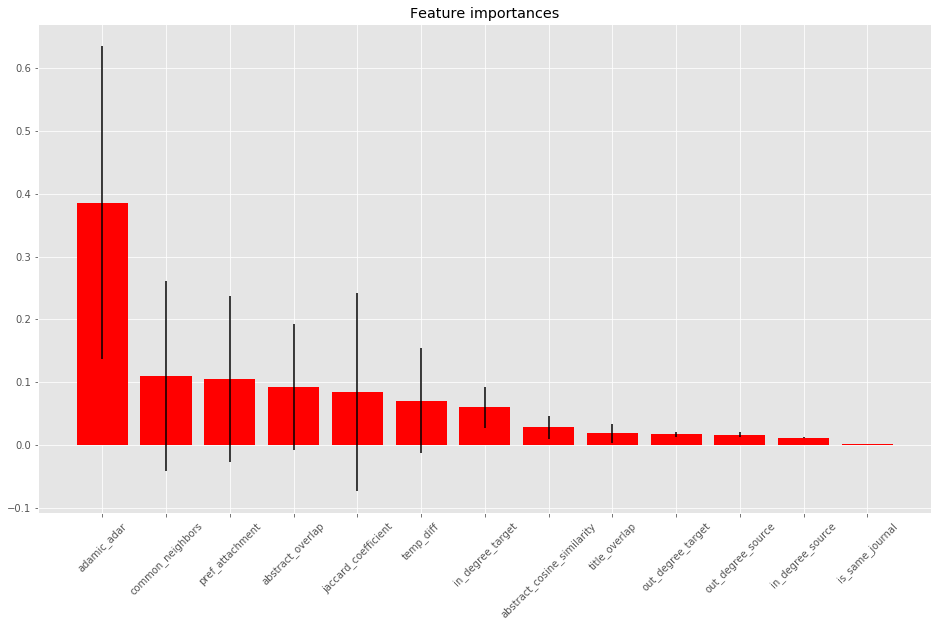

In [121]:
# Plot the importances of the features used
top_features = random_forest_features_importances(X, y, n_estimators=10)

## Combination of node2vec and features $F$

In [49]:
X = df[F_features + node2vec_features]
y = df.label
print("{} features are used".format(X.shape[1]))

141 features are used


In [50]:
# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=1)

# Set a 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
    
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(clf, X, y, cv=cv, scoring='f1')\
    .mean()))

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   55.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   54.6s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   60.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   59.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


Mean of cross-validation F1: 0.970


| Features used            | Mean cross-validated f1-score |
|--------------------------|-------------------------------|
| node2vec 128 embeddings  | 0.832                         |
| $F$ features             | 0.971                         |
|  node2vec + $F$          | 0.970                         |

> To summarize, the use of the set of features $F$ gives the best results. Using node2vec features and the set $F$ gives similar results but the number of features is more than 10 times higher. Thus, we will use the set of features $F$ to compare different algorithms in the next section. 

## Fine-tuning the set $F$

In [122]:
# In the following, we try to select the K best
# features by plotting the score on 3-fold cross-val
# as a function of K

clf = GradientBoostingClassifier(n_estimators=10)
X = df[F_features]
y = df.label

scores = []
for i in range(len(top_features)):
    features_tested = top_features[:i+1]
    X_tested = X[features_tested]
    score = cross_val_score(clf, X_tested, y, cv=3, scoring='f1').mean()
    scores.append(score)

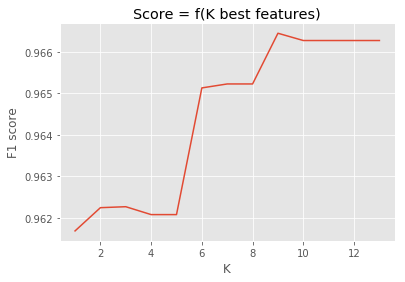

In [123]:
plt.plot(range(1,len(top_features)+1), scores)
plt.xlabel("K")
plt.ylabel("F1 score")
plt.title("Score = f(K best features)")
plt.show()

In [95]:
best_features = ["in_degree_target", "out_degree_target", "title_overlap", 
                 "temp_diff", "abstract_overlap", "jaccard_coefficient", 
                 "adamic_adar", "pref_attachment", "common_neighbors", 
                 "abstract_cosine_similarity"]

# Comparison of classifiers

In this section we compare multiple classifiers using the set of features $F$. We will use the default `scikit-learn` parameters for the classifiers.

In [104]:
X = df[best_features]
y = df.label
print("{} features are used".format(X.shape[1]))

10 features are used


In [105]:
# Set a 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)

## Logistic Regression 

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()

In [108]:
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(lr, X, y, cv=cv, scoring="f1", n_jobs=-1, verbose=2)\
    .mean()))

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s finished


Mean of cross-validation F1: 0.944


## Random Forest 

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf = RandomForestClassifier()

In [111]:
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(rf, X, y, cv=cv, scoring="f1", n_jobs=-1, verbose=2)\
    .mean()))

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.1s finished


Mean of cross-validation F1: 0.970


## Gradient boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gb = GradientBoostingClassifier()

In [114]:
# Get average cross-validation on 5 folds
print("Mean of cross-validation F1: {:.3f}"\
    .format(cross_val_score(gb, X, y, cv=cv, scoring="f1", n_jobs=-1, verbose=2)\
    .mean()))

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.4min finished


Mean of cross-validation F1: 0.971


| Algorithm                | Mean cross-validated f1-score |
|--------------------------|-------------------------------|
| Logistic Regression      | 0.944                         |
| Random Forest Classifier | 0.970                         |
| Gradient Boosting        | 0.971                        |

> We will choose the Gradient Boosting classifier given these comparisons.

# Gradient Boosting hyperparameter optimization 

The computations being too slow in the notebook, we have used the script `gradient_boosting_optimization.py` in order to tune the different parameters of the Gradient Boosting classifier. We have optimized the following parameters in this order using :

1.  `n_estimators`
2. `max_depth` and `min_samples_split`
3. `min_samples_leaf`

The results obtained are in the files `gradient_boosting_hyperparameters_n.txt` where n is the order the tuning.

We have chosen 50 `estimators` since it gave already good results, and increasing the number of estimators would slow down the learning for the other parameters tunings. For the `max_depth`, we have chosen 7 since it gave similar results to a max depth of 9 (which has the disadvantage of overfitting more). Finally, these paramaters, combined with `min_samples_split` = 200 and `min_samples_leaf` = 60 gave the best results in terms of the 5-fold cross-validated mean f1-score.

# Predictions

In [34]:
from utils import complete_predictions

In [60]:
feature_engineer_test = FeatureEngineering(df_node_info, 
                                           data="test",
                                           path_word_embeddings=path_embeddings)

--> Opening the source-node data
--> Computing and adding the edge embeddings
--> Merging the source-node data with the node information
--> Creating an undirected graph from the training data
--> Creating a directed graph from the training data


In [96]:
%time feature_engineer_test.create_features(features=best_features)

--> Creating the feature 'in_degree_target' ...
it took 0min 1s
--> Creating the feature 'out_degree_target' ...
it took 0min 1s
--> Creating the feature 'title_overlap' ...
it took 0min 2s
--> Creating the feature 'temp_diff' ...
it took 0min 1s
--> Creating the feature 'abstract_overlap' ...
it took 0min 4s
--> Creating the feature 'jaccard_coefficient' ...
it took 0min 2s
--> Creating the feature 'adamic_adar' ...
it took 0min 9s
--> Creating the feature 'pref_attachment' ...
it took 0min 3s
--> Creating the feature 'common_neighbors' ...
it took 0min 2s
--> Creating the feature 'abstract_cosine_similarity' ...
Loaded 200000 pretrained word vectors
it took 0min 50s
Wall time: 1min 13s


In [97]:
# Test data 
X_test = feature_engineer_test.df[best_features]

In [98]:
# Train the classifier
clf = GradientBoostingClassifier(n_estimators=50, min_samples_split=200,
                                 min_samples_leaf=60, max_depth=7, verbose=1)
clf.fit(X[best_features], y)

      Iter       Train Loss   Remaining Time 
         1           1.2089            3.83m
         2           1.0703            4.44m
         3           0.9551            4.34m
         4           0.8579            4.38m
         5           0.7750            4.22m
         6           0.7039            3.94m
         7           0.6425            3.82m
         8           0.5891            3.64m
         9           0.5426            3.46m
        10           0.5017            3.31m
        20           0.2810            2.33m
        30           0.2101            1.53m
        40           0.1851           46.68s
        50           0.1753            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [99]:
# Make predictions on the test set
predictions = list(clf.predict(X_test[X_test.temp_diff >= 0]))
predictions = complete_predictions(X_test, predictions)

In [100]:
# File name for the predictions
file_name_prefix = "GB_final"
file_name = file_name_prefix + ".csv"

In [101]:
df_predictions = pd.DataFrame(predictions, columns=["category"])
df_predictions.index.names = ["id"]
df_predictions.head()

,category
id,
0,0
1,1
2,1
3,1
4,0


In [102]:
# Save the predictions
df_predictions.to_csv("predictions/{}".format(file_name))